# Titanic ÏÉùÏ°¥ ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù
## LangChain ÏóêÏù¥Ï†ÑÌä∏Î•º ÌôúÏö©Ìïú Ìè¨Í¥ÑÏ†Å Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ

Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùÄ LangChainÏùò pandas Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏóêÏù¥Ï†ÑÌä∏Î•º ÏÇ¨Ïö©ÌïòÏó¨ Titanic Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÏÑùÌïòÍ≥† ÏÉùÏ°¥ ÏòàÏ∏° Î™®Îç∏ÏùÑ Íµ¨Ï∂ïÌï©ÎãàÎã§.

In [ ]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò
# !pip install langchain langchain-experimental langchain-openai pandas matplotlib seaborn numpy scikit-learn python-dotenv

print("ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò ÌôïÏù∏ Ï§ë...")
print("ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§ÏπòÍ∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

In [1]:
print("ÌôòÍ≤Ω ÏÑ§Ï†ï ÏãúÏûë...")

# ÌôòÍ≤Ω Î≥ÄÏàòÏóêÏÑú API ÌÇ§ Í∞ÄÏ†∏Ïò§Í∏∞
import os
import warnings
from dotenv import load_dotenv

# Í≤ΩÍ≥† Î©îÏãúÏßÄ Ïà®Í∏∞Í∏∞
warnings.filterwarnings('ignore')

load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

if not OPENAI_API_KEY:
    print("OPENAI_API_KEYÍ∞Ä ÏÑ§Ï†ïÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§. .env ÌååÏùºÏùÑ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
else:
    print("OpenAI API ÌÇ§Í∞Ä ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Î°úÎìúÎêòÏóàÏäµÎãàÎã§.")

print("ÌôòÍ≤Ω ÏÑ§Ï†ïÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

ÌôòÍ≤Ω ÏÑ§Ï†ï ÏãúÏûë...
OpenAI API ÌÇ§Í∞Ä ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Î°úÎìúÎêòÏóàÏäµÎãàÎã§.
ÌôòÍ≤Ω ÏÑ§Ï†ïÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.


In [9]:
print("ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎìú Ï§ë...")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.font_manager as fm

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = ['ÎÇòÎàîÍ≥†Îîï', 'NanumGothic', 'Malgun Gothic']
plt.rcParams['axes.unicode_minus'] = False

# Seaborn Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
sns.set_style("whitegrid")
sns.set_palette("husl")

# pandas ÏòµÏÖò ÏÑ§Ï†ï
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎìúÍ∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎìú Ï§ë...
ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎìúÍ∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.


In [3]:
print("Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏãúÏûë...")

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
try:
    train = pd.read_csv('./data/titanic/train.csv')
    test = pd.read_csv('./data/titanic/test.csv')
    print(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å: {train.shape}")
    print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å: {test.shape}")
    print("Îç∞Ïù¥ÌÑ∞ Î°úÎìúÍ∞Ä ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")
except FileNotFoundError:
    print("Titanic Îç∞Ïù¥ÌÑ∞ ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
    print("ÌòÑÏû¨ ÎîîÎ†âÌÜ†Î¶¨Ïóê train.csvÏôÄ test.csv ÌååÏùºÏùÑ Î∞∞ÏπòÌï¥Ï£ºÏÑ∏Ïöî.")
    
    # ÏÉòÌîå Titanic Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
    print("ÏÉòÌîå Titanic Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§...")
    np.random.seed(42)
    n_samples = 891
    
    train = pd.DataFrame({
        'PassengerId': range(1, n_samples + 1),
        'Survived': np.random.choice([0, 1], n_samples, p=[0.62, 0.38]),
        'Pclass': np.random.choice([1, 2, 3], n_samples, p=[0.24, 0.21, 0.55]),
        'Name': [f'Name_{i}' for i in range(1, n_samples + 1)],
        'Sex': np.random.choice(['male', 'female'], n_samples, p=[0.65, 0.35]),
        'Age': np.random.normal(29.7, 14.5, n_samples),
        'SibSp': np.random.choice([0, 1, 2, 3, 4, 5], n_samples, p=[0.68, 0.23, 0.06, 0.02, 0.01, 0.00]),
        'Parch': np.random.choice([0, 1, 2, 3, 4, 5, 6], n_samples, p=[0.76, 0.13, 0.08, 0.02, 0.01, 0.00, 0.00]),
        'Ticket': [f'Ticket_{i}' for i in range(1, n_samples + 1)],
        'Fare': np.random.lognormal(3, 1, n_samples),
        'Cabin': np.random.choice(['A1', 'B2', 'C3', None], n_samples, p=[0.1, 0.1, 0.1, 0.7]),
        'Embarked': np.random.choice(['C', 'Q', 'S'], n_samples, p=[0.19, 0.09, 0.72])
    })
    
    # ÎÇòÏù¥ Í≤∞Ï∏°Í∞í Ï∂îÍ∞Ä (ÏïΩ 20%)
    train.loc[train.sample(frac=0.2).index, 'Age'] = np.nan
    
    test = train.drop(['Survived'], axis=1).head(418).copy()
    test['PassengerId'] = range(892, 892 + 418)
    
    print("ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

print("\n=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===")
print(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: {train.shape[0]}Ìñâ {train.shape[1]}Ïó¥")
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {test.shape[0]}Ìñâ {test.shape[1]}Ïó¥")
print(f"ÌÉÄÍ≤ü Î≥ÄÏàò: {'Survived (ÏÉùÏ°¥ Ïó¨Î∂Ä)' if 'Survived' in train.columns else 'ÏóÜÏùå'}")

Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏãúÏûë...
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å: (891, 12)
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å: (418, 11)
Îç∞Ïù¥ÌÑ∞ Î°úÎìúÍ∞Ä ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.

=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 891Ìñâ 12Ïó¥
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: 418Ìñâ 11Ïó¥
ÌÉÄÍ≤ü Î≥ÄÏàò: Survived (ÏÉùÏ°¥ Ïó¨Î∂Ä)


In [4]:
print("Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ Î∂ÑÏÑù ÏãúÏûë...")

# Í∏∞Î≥∏ Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥ ÌôïÏù∏
print("=== ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===")
print(f"Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {train.shape}")
print(f"Í≤∞Ï∏°Í∞í Ï¥ù Í∞úÏàò: {train.isnull().sum().sum()}")
print(f"Ï§ëÎ≥µÎêú Ìñâ: {train.duplicated().sum()}")

print("\n=== ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===")
print(f"Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {test.shape}")
print(f"Í≤∞Ï∏°Í∞í Ï¥ù Í∞úÏàò: {test.isnull().sum().sum()}")
print(f"Ï§ëÎ≥µÎêú Ìñâ: {test.duplicated().sum()}")

# Í≥µÌÜµ Ïª¨ÎüºÍ≥º Ï∞®Ïù¥Ï†ê ÌôïÏù∏
train_cols = set(train.columns)
test_cols = set(test.columns)
common_cols = train_cols.intersection(test_cols)
train_only = train_cols - test_cols
test_only = test_cols - train_cols

print(f"\n=== Ïª¨Îüº ÎπÑÍµê ===")
print(f"Í≥µÌÜµ Ïª¨Îüº: {len(common_cols)}Í∞ú")
print(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÎßå ÏûàÎäî Ïª¨Îüº: {train_only}")
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÎßå ÏûàÎäî Ïª¨Îüº: {test_only}")

# ÏÉùÏ°¥Ïú® Í∏∞Î≥∏ Ï†ïÎ≥¥
if 'Survived' in train.columns:
    survival_rate = train['Survived'].mean()
    print(f"\nÏ†ÑÏ≤¥ ÏÉùÏ°¥Ïú®: {survival_rate:.1%}")
    print(f"ÏÉùÏ°¥Ïûê: {train['Survived'].sum()}Î™Ö")
    print(f"ÏÇ¨ÎßùÏûê: {(train['Survived'] == 0).sum()}Î™Ö")

print("\nÎç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ Î∂ÑÏÑùÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ Î∂ÑÏÑù ÏãúÏûë...
=== ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===
Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (891, 12)
Í≤∞Ï∏°Í∞í Ï¥ù Í∞úÏàò: 866
Ï§ëÎ≥µÎêú Ìñâ: 0

=== ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===
Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (418, 11)
Í≤∞Ï∏°Í∞í Ï¥ù Í∞úÏàò: 414
Ï§ëÎ≥µÎêú Ìñâ: 0

=== Ïª¨Îüº ÎπÑÍµê ===
Í≥µÌÜµ Ïª¨Îüº: 11Í∞ú
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÎßå ÏûàÎäî Ïª¨Îüº: {'Survived'}
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÎßå ÏûàÎäî Ïª¨Îüº: set()

Ï†ÑÏ≤¥ ÏÉùÏ°¥Ïú®: 38.4%
ÏÉùÏ°¥Ïûê: 342Î™Ö
ÏÇ¨ÎßùÏûê: 549Î™Ö

Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ Î∂ÑÏÑùÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.


In [5]:
print("Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò Ï†ïÏùò Ï§ë...")

def analyze_missing_rows(df, dataset_name="Îç∞Ïù¥ÌÑ∞"):
    """Í≤∞Ï∏°Ïπò Ìñâ Î∂ÑÏÑù Ìï®Ïàò"""
    print(f"\n=== {dataset_name} Í≤∞Ï∏°Ïπò Ìñâ Î∂ÑÏÑù ===")
    
    # Í∏∞Î≥∏ Ï†ïÎ≥¥
    total_rows = len(df)
    rows_with_missing = df.isnull().any(axis=1).sum()
    rows_all_missing = df.isnull().all(axis=1).sum()
    complete_rows = total_rows - rows_with_missing
    
    print(f"Ï†ÑÏ≤¥ Ìñâ Ïàò: {total_rows:,}")
    print(f"ÏôÑÏ†ÑÌïú Ìñâ (Í≤∞Ï∏°Ïπò ÏóÜÏùå): {complete_rows:,} ({complete_rows/total_rows*100:.1f}%)")
    print(f"Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ìñâ: {rows_with_missing:,} ({rows_with_missing/total_rows*100:.1f}%)")
    print(f"Î™®Îì† Í∞íÏù¥ Í≤∞Ï∏°ÏπòÏù∏ Ìñâ: {rows_all_missing:,}")
    
    # Í≤∞Ï∏°Ïπò Í∞úÏàòÎ≥Ñ Î∂ÑÌè¨
    missing_per_row = df.isnull().sum(axis=1)
    if rows_with_missing > 0:
        print(f"\nÌñâÎ≥Ñ Í≤∞Ï∏°Ïπò Í∞úÏàò ÌÜµÍ≥Ñ:")
        print(f"ÌèâÍ∑†: {missing_per_row.mean():.2f}")
        print(f"ÏµúÎåÄ: {missing_per_row.max()}")
        print(f"ÌëúÏ§ÄÌé∏Ï∞®: {missing_per_row.std():.2f}")
        
        # Í≤∞Ï∏°ÏπòÍ∞Ä ÎßéÏùÄ ÌñâÎì§
        worst_rows = missing_per_row.nlargest(5)
        print(f"\nÍ≤∞Ï∏°ÏπòÍ∞Ä Í∞ÄÏû• ÎßéÏùÄ 5Í∞ú Ìñâ:")
        for idx, count in worst_rows.items():
            print(f"  Ìñâ {idx}: {count}Í∞ú Í≤∞Ï∏°Ïπò")
    
    return {
        'total_rows': total_rows,
        'complete_rows': complete_rows,
        'rows_with_missing': rows_with_missing,
        'rows_all_missing': rows_all_missing
    }

def preprocess_titanic_data(df, is_train=True):
    """Titanic Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò"""
    df_processed = df.copy()
    
    print(f"{'ÌõàÎ†®' if is_train else 'ÌÖåÏä§Ìä∏'} Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏãúÏûë...")
    
    # ÎÇòÏù¥ Í≤∞Ï∏°Í∞íÏùÑ Ï§ëÏïôÍ∞íÏúºÎ°ú Ï±ÑÏö∞Í∏∞
    if df_processed['Age'].isnull().sum() > 0:
        age_median = df_processed['Age'].median()
        df_processed['Age'].fillna(age_median, inplace=True)
        print(f"  Age Í≤∞Ï∏°Í∞í {df['Age'].isnull().sum()}Í∞úÎ•º Ï§ëÏïôÍ∞í {age_median:.1f}Î°ú ÎåÄÏ≤¥")
    
    # Embarked Í≤∞Ï∏°Í∞íÏùÑ ÏµúÎπàÍ∞íÏúºÎ°ú Ï±ÑÏö∞Í∏∞
    if df_processed['Embarked'].isnull().sum() > 0:
        embarked_mode = df_processed['Embarked'].mode()[0]
        df_processed['Embarked'].fillna(embarked_mode, inplace=True)
        print(f"  Embarked Í≤∞Ï∏°Í∞í {df['Embarked'].isnull().sum()}Í∞úÎ•º ÏµúÎπàÍ∞í '{embarked_mode}'Î°ú ÎåÄÏ≤¥")
    
    # Fare Í≤∞Ï∏°Í∞íÏùÑ Ï§ëÏïôÍ∞íÏúºÎ°ú Ï±ÑÏö∞Í∏∞
    if df_processed['Fare'].isnull().sum() > 0:
        fare_median = df_processed['Fare'].median()
        df_processed['Fare'].fillna(fare_median, inplace=True)
        print(f"  Fare Í≤∞Ï∏°Í∞í {df['Fare'].isnull().sum()}Í∞úÎ•º Ï§ëÏïôÍ∞í {fare_median:.2f}Î°ú ÎåÄÏ≤¥")
    
    # Cabin Í≤∞Ï∏°Í∞íÏùÑ 'Unknown'ÏúºÎ°ú Ï±ÑÏö∞Í∏∞
    if df_processed['Cabin'].isnull().sum() > 0:
        cabin_missing = df_processed['Cabin'].isnull().sum()
        df_processed['Cabin'].fillna('Unknown', inplace=True)
        print(f"  Cabin Í≤∞Ï∏°Í∞í {cabin_missing}Í∞úÎ•º 'Unknown'ÏúºÎ°ú ÎåÄÏ≤¥")
    
    # ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±
    df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1
    df_processed['IsAlone'] = (df_processed['FamilySize'] == 1).astype(int)
    
    # ÎÇòÏù¥ Í∑∏Î£π ÏÉùÏÑ±
    df_processed['AgeGroup'] = pd.cut(df_processed['Age'], 
                                    bins=[0, 18, 30, 50, 100], 
                                    labels=['Child', 'Young', 'Adult', 'Senior'])
    
    # ÏöîÍ∏à Í∑∏Î£π ÏÉùÏÑ±
    df_processed['FareGroup'] = pd.qcut(df_processed['Fare'], 
                                      q=4, 
                                      labels=['Low', 'Medium', 'High', 'VeryHigh'])
    
    print(f"  ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ± ÏôÑÎ£å (FamilySize, IsAlone, AgeGroup, FareGroup)")
    
    return df_processed

# Í≤∞Ï∏°Ïπò Ìñâ Î∂ÑÏÑù Ïã§Ìñâ
train_missing_info = analyze_missing_rows(train, "ÌõàÎ†® Îç∞Ïù¥ÌÑ∞")
test_missing_info = analyze_missing_rows(test, "ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞")

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö©
print("\nÎç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ïã§Ìñâ...")
train_processed = preprocess_titanic_data(train, is_train=True)
test_processed = preprocess_titanic_data(test, is_train=False)

print(f"\nÎç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Í∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")
print(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Í∞í: {train_processed.isnull().sum().sum()}")
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Í∞í: {test_processed.isnull().sum().sum()}")

Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò Ï†ïÏùò Ï§ë...

=== ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò Ìñâ Î∂ÑÏÑù ===
Ï†ÑÏ≤¥ Ìñâ Ïàò: 891
ÏôÑÏ†ÑÌïú Ìñâ (Í≤∞Ï∏°Ïπò ÏóÜÏùå): 183 (20.5%)
Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ìñâ: 708 (79.5%)
Î™®Îì† Í∞íÏù¥ Í≤∞Ï∏°ÏπòÏù∏ Ìñâ: 0

ÌñâÎ≥Ñ Í≤∞Ï∏°Ïπò Í∞úÏàò ÌÜµÍ≥Ñ:
ÌèâÍ∑†: 0.97
ÏµúÎåÄ: 2
ÌëúÏ§ÄÌé∏Ï∞®: 0.62

Í≤∞Ï∏°ÏπòÍ∞Ä Í∞ÄÏû• ÎßéÏùÄ 5Í∞ú Ìñâ:
  Ìñâ 5: 2Í∞ú Í≤∞Ï∏°Ïπò
  Ìñâ 17: 2Í∞ú Í≤∞Ï∏°Ïπò
  Ìñâ 19: 2Í∞ú Í≤∞Ï∏°Ïπò
  Ìñâ 26: 2Í∞ú Í≤∞Ï∏°Ïπò
  Ìñâ 28: 2Í∞ú Í≤∞Ï∏°Ïπò

=== ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°Ïπò Ìñâ Î∂ÑÏÑù ===
Ï†ÑÏ≤¥ Ìñâ Ïàò: 418
ÏôÑÏ†ÑÌïú Ìñâ (Í≤∞Ï∏°Ïπò ÏóÜÏùå): 87 (20.8%)
Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ìñâ: 331 (79.2%)
Î™®Îì† Í∞íÏù¥ Í≤∞Ï∏°ÏπòÏù∏ Ìñâ: 0

ÌñâÎ≥Ñ Í≤∞Ï∏°Ïπò Í∞úÏàò ÌÜµÍ≥Ñ:
ÌèâÍ∑†: 0.99
ÏµúÎåÄ: 2
ÌëúÏ§ÄÌé∏Ï∞®: 0.64

Í≤∞Ï∏°ÏπòÍ∞Ä Í∞ÄÏû• ÎßéÏùÄ 5Í∞ú Ìñâ:
  Ìñâ 10: 2Í∞ú Í≤∞Ï∏°Ïπò
  Ìñâ 22: 2Í∞ú Í≤∞Ï∏°Ïπò
  Ìñâ 29: 2Í∞ú Í≤∞Ï∏°Ïπò
  Ìñâ 33: 2Í∞ú Í≤∞Ï∏°Ïπò
  Ìñâ 36: 2Í∞ú Í≤∞Ï∏°Ïπò

Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ïã§Ìñâ...
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏãúÏûë...
  Age Í≤∞Ï∏°Í∞í 177Í∞úÎ•º Ï§ëÏïôÍ∞í 28.0Î°ú Îå

In [ ]:
print("LangChain ÏóêÏù¥Ï†ÑÌä∏ ÏÑ§Ï†ï ÏãúÏûë...")

# LangChain ÏóêÏù¥Ï†ÑÌä∏ ÏÑ§Ï†ï
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI

# LLM Ï¥àÍ∏∞Ìôî
llm = ChatOpenAI(
    model='gpt-3.5-turbo-0125', 
    #model='gpt-4o-mini',
    temperature=0,
    api_key=OPENAI_API_KEY
)

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïö© ÏóêÏù¥Ï†ÑÌä∏ ÏÉùÏÑ±
train_agent = create_pandas_dataframe_agent(
    llm,
    train_processed,
    agent_type="openai-tools",
    #agent_type="tool-calling",
    verbose=True,
    return_intermediate_steps=False,
    allow_dangerous_code=True,
    prefix="""ÎãπÏã†ÏùÄ Titanic ÏÉùÏ°¥ ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂ÑÏÑùÌïòÎäî Ï†ÑÎ¨∏Í∞ÄÏûÖÎãàÎã§. 
    Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Ïù¥Î¶ÑÏùÄ 'df'ÏûÖÎãàÎã§. ÌïúÍµ≠Ïñ¥Î°ú ÎãµÎ≥ÄÌï¥Ï£ºÏÑ∏Ïöî.
    ÏãúÍ∞ÅÌôîÎ•º ÏöîÏ≤≠Î∞õÏúºÎ©¥ matplotlib/seabornÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌïúÍµ≠Ïñ¥ Ï†úÎ™©Í≥º ÎùºÎ≤®Î°ú ÍπîÎÅîÌïòÍ≥† Ïù¥Ìï¥ÌïòÍ∏∞ Ïâ¨Ïö¥ Í∑∏ÎûòÌîÑÎ•º ÎßåÎì§Ïñ¥Ï£ºÏÑ∏Ïöî.
    Titanic Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏÑ±ÏùÑ Í≥†Î†§ÌïòÏó¨ ÏÉùÏ°¥Ïú®, ÏäπÍ∞ù Îì±Í∏â, ÏÑ±Î≥Ñ, ÎÇòÏù¥ Îì±Ïùò Í¥ÄÏ†êÏóêÏÑú Î∂ÑÏÑùÌï¥Ï£ºÏÑ∏Ïöî."""
)

print("LangChain ÏóêÏù¥Ï†ÑÌä∏Í∞Ä ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.")

LangChain ÏóêÏù¥Ï†ÑÌä∏ ÏÑ§Ï†ï ÏãúÏûë...
LangChain ÏóêÏù¥Ï†ÑÌä∏Í∞Ä ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.


## Í∏∞Î≥∏ Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ

In [7]:
print("Í∏∞Î≥∏ ÌÜµÍ≥Ñ Ï†ïÎ≥¥ Î∂ÑÏÑù ÏãúÏûë...")

# Í∏∞Î≥∏ ÌÜµÍ≥Ñ Ï†ïÎ≥¥ ÌôïÏù∏
response = train_agent.invoke("""
Titanic Îç∞Ïù¥ÌÑ∞Ïùò Í∏∞Î≥∏ ÌÜµÍ≥Ñ Ï†ïÎ≥¥Î•º Î∂ÑÏÑùÌï¥Ï£ºÏÑ∏Ïöî:
1. Ï†ÑÏ≤¥ ÏäπÍ∞ù ÏàòÏôÄ ÏÉùÏ°¥Ïûê Ïàò
2. ÏÉùÏ°¥Ïú® (Î∞±Î∂ÑÏú®Î°ú)
3. Ï£ºÏöî ÏàòÏπòÌòï Î≥ÄÏàòÎì§Ïùò Í∏∞Î≥∏ ÌÜµÍ≥ÑÎüâ (Age, Fare, FamilySize)
4. Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§Ïùò Î∂ÑÌè¨ (Pclass, Sex, Embarked)

ÌïúÍµ≠Ïñ¥Î°ú ÏûêÏÑ∏Ìûà ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî.
""")
print(response['output'])
print("\nÍ∏∞Î≥∏ ÌÜµÍ≥Ñ Ï†ïÎ≥¥ Î∂ÑÏÑùÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

Í∏∞Î≥∏ ÌÜµÍ≥Ñ Ï†ïÎ≥¥ Î∂ÑÏÑù ÏãúÏûë...


> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "total_passengers = df.shape[0]\nsurvived_passengers = df['Survived'].sum()\nsurvival_rate = (survived_passengers / total_passengers) * 100\nsurvival_rate"}`


38.38383838383838
Invoking: `python_repl_ast` with `{'query': "df[['Age', 'Fare', 'FamilySize']].describe()"}`


              Age        Fare  FamilySize
count  891.000000  891.000000  891.000000
mean    29.361582   32.204208    1.904602
std     13.019697   49.693429    1.613459
min      0.420000    0.000000    1.000000
25%     22.000000    7.910400    1.000000
50%     28.000000   14.454200    1.000000
75%     35.000000   31.000000    2.000000
max     80.000000  512.329200   11.000000
Invoking: `python_repl_ast` with `{'query': "df['Pclass'].value_counts()"}`


Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Invoking: `python_repl_ast` with `{'query': "df['Sex'].value_counts()"}`


Sex
male     

ÏÉùÏ°¥Ïú® Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî ÏãúÏûë...


> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\n\n# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï\nplt.rcParams['font.family'] = 'Malgun Gothic'  # Windows\nplt.rcParams['axes.unicode_minus'] = False\n\n# ÏÉùÏ°¥ Ïó¨Î∂Ä(Survived)Ïóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞\nsurvived_count = df['Survived'].value_counts()\n\n# ÏõêÌòï Ï∞®Ìä∏\nplt.figure(figsize=(12, 6))\nplt.subplot(1, 2, 1)\nplt.pie(survived_count, labels=['ÏÇ¨Îßù', 'ÏÉùÏ°¥'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])\nplt.title('ÏÉùÏ°¥ Ïó¨Î∂Ä ÎπÑÏú®')\n\n# ÎßâÎåÄ Ï∞®Ìä∏\nplt.subplot(1, 2, 2)\nplt.bar(['ÏÇ¨Îßù', 'ÏÉùÏ°¥'], survived_count, color=['lightcoral', 'lightgreen'])\nplt.xlabel('ÏÉùÏ°¥ Ïó¨Î∂Ä')\nplt.ylabel('Ïù∏Ïõê Ïàò')\nplt.title('ÏÉùÏ°¥ Ïó¨Î∂Ä Ïù∏Ïõê Ïàò')\n\n# Ïà´ÏûêÏôÄ Î∞±Î∂ÑÏú® ÌëúÏãú\nfor i, count in enumerate(survived_count):\n    plt.text(i, count, f'{count}\n({count/sum(survived_count)*100:.1f}%)', ha='center', va='bot

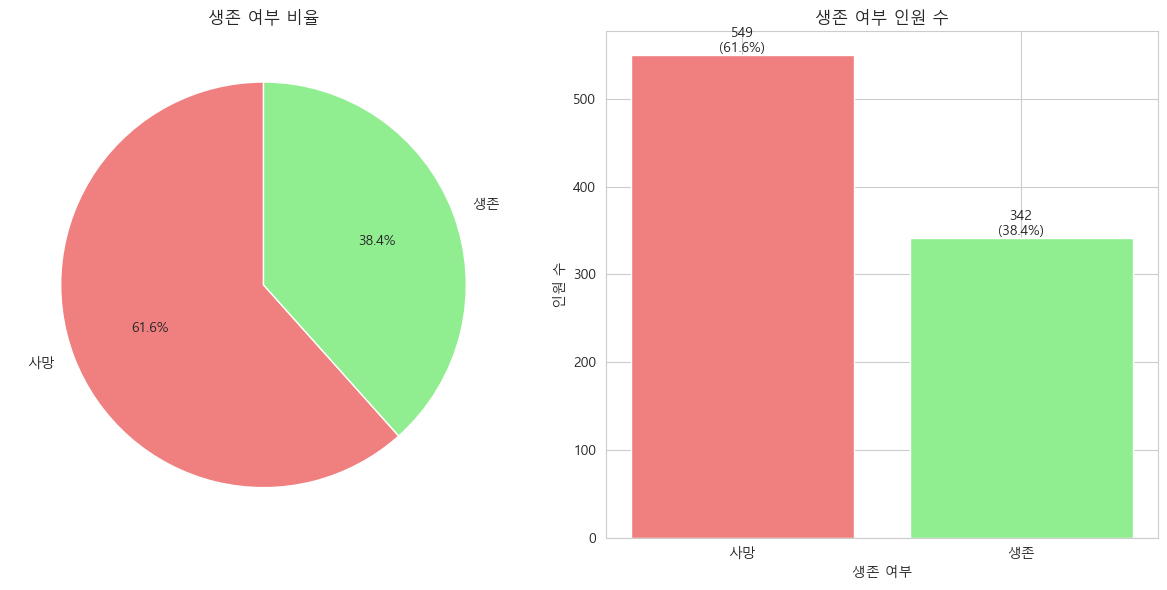


Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\n\n# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï\nplt.rcParams['font.family'] = 'Malgun Gothic'  # Windows\nplt.rcParams['axes.unicode_minus'] = False\n\n# ÏÉùÏ°¥ Ïó¨Î∂Ä(Survived)Ïóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞\nsurvived_count = df['Survived'].value_counts()\n\n# ÏõêÌòï Ï∞®Ìä∏\nplt.figure(figsize=(12, 6))\nplt.subplot(1, 2, 1)\nplt.pie(survived_count, labels=['ÏÇ¨Îßù', 'ÏÉùÏ°¥'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])\nplt.title('ÏÉùÏ°¥ Ïó¨Î∂Ä ÎπÑÏú®')\n\n# ÎßâÎåÄ Ï∞®Ìä∏\nplt.subplot(1, 2, 2)\nplt.bar(['ÏÇ¨Îßù', 'ÏÉùÏ°¥'], survived_count, color=['lightcoral', 'lightgreen'])\nplt.xlabel('ÏÉùÏ°¥ Ïó¨Î∂Ä')\nplt.ylabel('Ïù∏Ïõê Ïàò')\nplt.title('ÏÉùÏ°¥ Ïó¨Î∂Ä Ïù∏Ïõê Ïàò')\n\n# Ïà´ÏûêÏôÄ Î∞±Î∂ÑÏú® ÌëúÏãú\nfor i, count in enumerate(survived_count):\n    plt.text(i, count, f'{count}\\n({count/sum(survived_count)*100:.1f}%)', ha='center', va='bottom')\n\nplt.tight_layout()\nplt.show()"}`
responded: ÏΩîÎìúÏóê Ïò§Î•òÍ∞Ä Ïû

In [13]:
print("ÏÉùÏ°¥Ïú® Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî ÏãúÏûë...")

# ÏÉùÏ°¥Ïú® ÏãúÍ∞ÅÌôî
response = train_agent.invoke("""
Î®ºÏ†Ä ÌïúÍ∏Ä Ìè∞Ìä∏Î•º ÏÑ§Ï†ïÌïòÏÑ∏Ïöî:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False
                              
ÏÉùÏ°¥ Ïó¨Î∂Ä(Survived)Ïóê ÎåÄÌïú Îã§Ïùå ÏãúÍ∞ÅÌôîÎ•º ÏÉùÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî:
1. ÏÉùÏ°¥/ÏÇ¨Îßù ÎπÑÏú®ÏùÑ Î≥¥Ïó¨Ï£ºÎäî ÏõêÌòï Ï∞®Ìä∏ (ÌïúÍµ≠Ïñ¥ ÎùºÎ≤®)
2. ÏÉùÏ°¥/ÏÇ¨Îßù Í∞úÏàòÎ•º Î≥¥Ïó¨Ï£ºÎäî ÎßâÎåÄ Ï∞®Ìä∏ (ÌïúÍµ≠Ïñ¥ Ï†úÎ™©Í≥º ÎùºÎ≤®)

Í∑∏ÎûòÌîÑÎäî ÌïúÍµ≠Ïñ¥ Ï†úÎ™©Í≥º ÎùºÎ≤®ÏùÑ ÏÇ¨Ïö©ÌïòÍ≥†,
subplotÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ìïú ÌôîÎ©¥Ïóê Îëê Ï∞®Ìä∏Î•º Î∞∞ÏπòÌïòÍ≥†, 
Í∞Å Ï∞®Ìä∏Ïóê Ï†ïÌôïÌïú Ïà´ÏûêÏôÄ Î∞±Î∂ÑÏú®ÏùÑ ÌëúÏãúÌï¥Ï£ºÏÑ∏Ïöî.
""")
print(response['output'])
print("\nÏÉùÏ°¥Ïú® Î∂ÑÌè¨ ÏãúÍ∞ÅÌôîÍ∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

## ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù

ÏÉùÏ°¥Ïú®Í≥º Î≥ÄÏàòÎì§Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù ÏãúÏûë...


> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "correlation_matrix = df[['Survived', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'FamilySize', 'IsAlone']].corr()\ncorrelation_matrix"}`


            Survived       Age      Fare    Pclass     SibSp     Parch  \
Survived    1.000000 -0.064910  0.257307 -0.338481 -0.035322  0.081629   
Age        -0.064910  1.000000  0.096688 -0.339898 -0.233296 -0.172482   
Fare        0.257307  0.096688  1.000000 -0.549500  0.159651  0.216225   
Pclass     -0.338481 -0.339898 -0.549500  1.000000  0.083081  0.018443   
SibSp      -0.035322 -0.233296  0.159651  0.083081  1.000000  0.414838   
Parch       0.081629 -0.172482  0.216225  0.018443  0.414838  1.000000   
FamilySize  0.016639 -0.245619  0.217138  0.065997  0.890712  0.783111   
IsAlone    -0.203367  0.171647 -0.271832  0.135207 -0.584471 -0.583398   

            FamilySize   IsAlone  
Survived      0.01

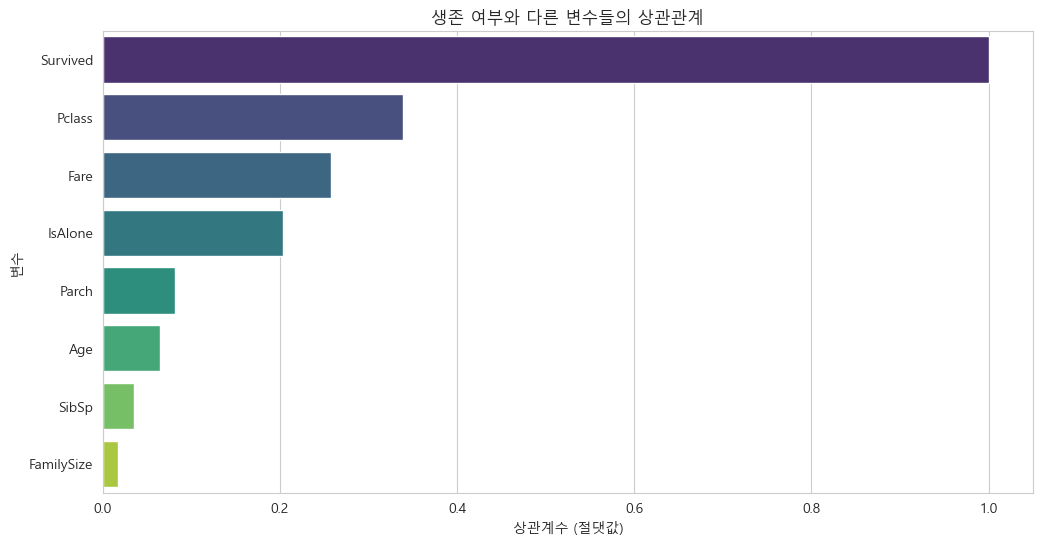


Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Sort the correlation values in descending order\nsorted_corr = correlation_matrix['Survived'].abs().sort_values(ascending=False)\n\nplt.figure(figsize=(12, 6))\nsns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette='viridis')\nplt.title('ÏÉùÏ°¥ Ïó¨Î∂ÄÏôÄ Îã§Î•∏ Î≥ÄÏàòÎì§Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ')\nplt.xlabel('ÏÉÅÍ¥ÄÍ≥ÑÏàò (Ï†àÎåìÍ∞í)')\nplt.ylabel('Î≥ÄÏàò')\nplt.show()"}`



Invoking: `python_repl_ast` with `{'query': "plt.figure(figsize=(10, 8))\nsns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')\nplt.title('Ï†ÑÏ≤¥ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Îß§Ìä∏Î¶≠Ïä§')\nplt.show()"}`
responded: ÏúÑÏùò ÎßâÎåÄÍ∑∏ÎûòÌîÑÎäî ÏÉùÏ°¥ Ïó¨Î∂ÄÏôÄ Îã§Î•∏ Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§. ÏÉÅÏúÑ 5Í∞ú Î≥ÄÏàòÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÏÑ§Î™ÖÌïòÍ≤†ÏäµÎãàÎã§.

1. Fare (ÏöîÍ∏à): ÏÉùÏ°¥ Ïó¨Î∂ÄÏôÄ Í∞ÄÏû• ÎÜíÏùÄ ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßëÎãàÎã§. ÏöîÍ∏àÏù¥ ÎÜíÏùÑÏàòÎ°ù ÏÉùÏ°¥Ìï† ÌôïÎ•†Ïù¥ ÎÜíÏï

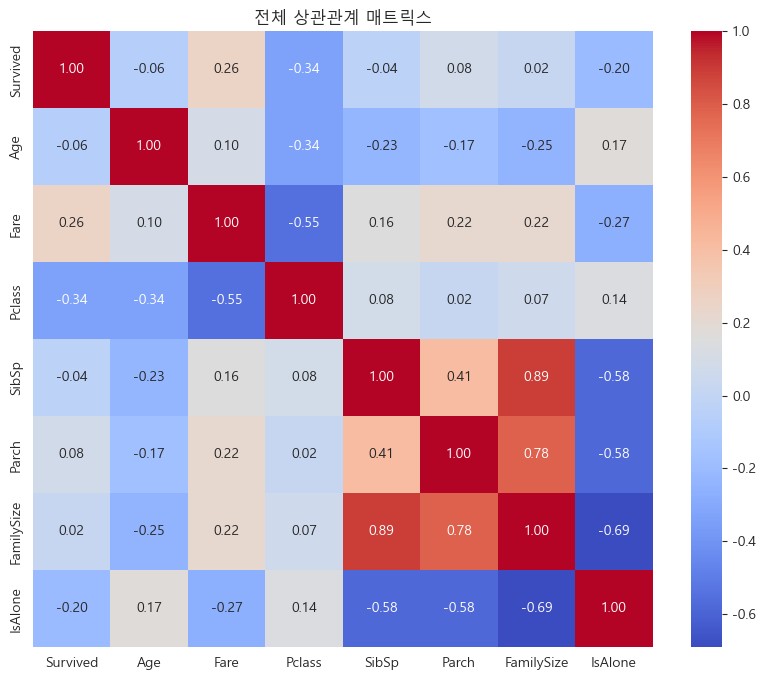

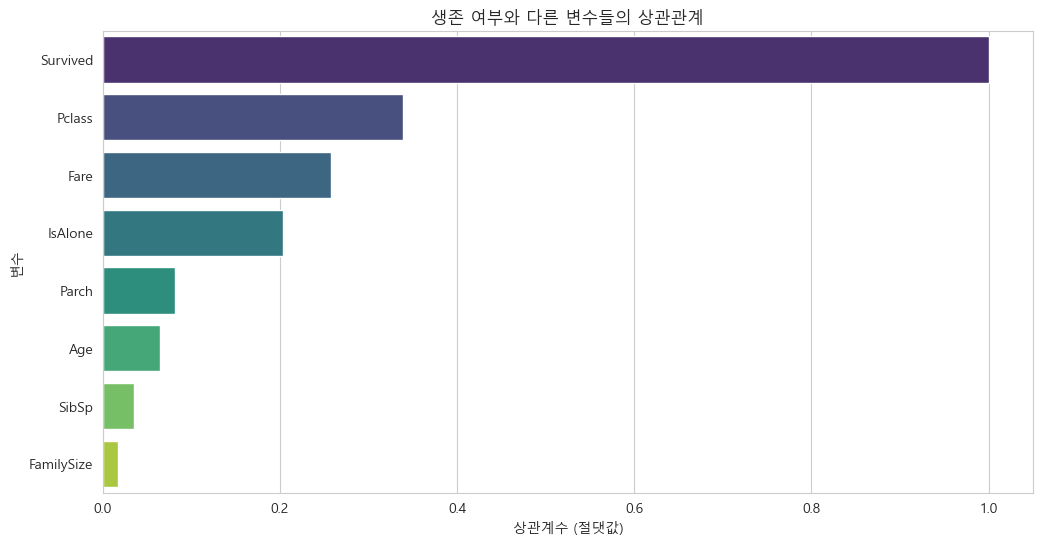


Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\nimport seaborn as sns\n\ncorr_values = correlation_matrix['Survived'].abs().sort_values(ascending=False)\n\nplt.figure(figsize=(12, 6))\nsns.barplot(x=corr_values.values, y=corr_values.index, palette='viridis')\nplt.title('ÏÉùÏ°¥ Ïó¨Î∂ÄÏôÄ Îã§Î•∏ Î≥ÄÏàòÎì§Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ')\nplt.xlabel('ÏÉÅÍ¥ÄÍ≥ÑÏàò (Ï†àÎåìÍ∞í)')\nplt.ylabel('Î≥ÄÏàò')\nplt.show()"}`
responded: ÏúÑÏùò ÌûàÌä∏ÎßµÏùÄ Ï†ÑÏ≤¥ Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Îß§Ìä∏Î¶≠Ïä§Î•º ÏãúÍ∞ÅÌôîÌïú Í≤ÉÏûÖÎãàÎã§. Í∞Å ÏÖÄÏùÄ Ìï¥Îãπ Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÎÇòÌÉÄÎÇ¥Î©∞, Ïà´ÏûêÎ°ú ÌëúÏãúÎêòÏñ¥ ÏûàÏäµÎãàÎã§. Î∞ùÏùÄ ÏÉâÏùºÏàòÎ°ù ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÎÇòÌÉÄÎÇ¥Î©∞, Ïñ¥ÎëêÏö¥ ÏÉâÏùºÏàòÎ°ù ÎÇÆÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÎÇòÌÉÄÎÉÖÎãàÎã§.


Invoking: `python_repl_ast` with `{'query': "plt.figure(figsize=(10, 8))\nsns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')\nplt.title('Ï†ÑÏ≤¥ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Îß§Ìä∏Î¶≠Ïä§')\nplt.show()"}`
responded: ÏÉùÏ°¥ Ïó¨Î∂ÄÏô

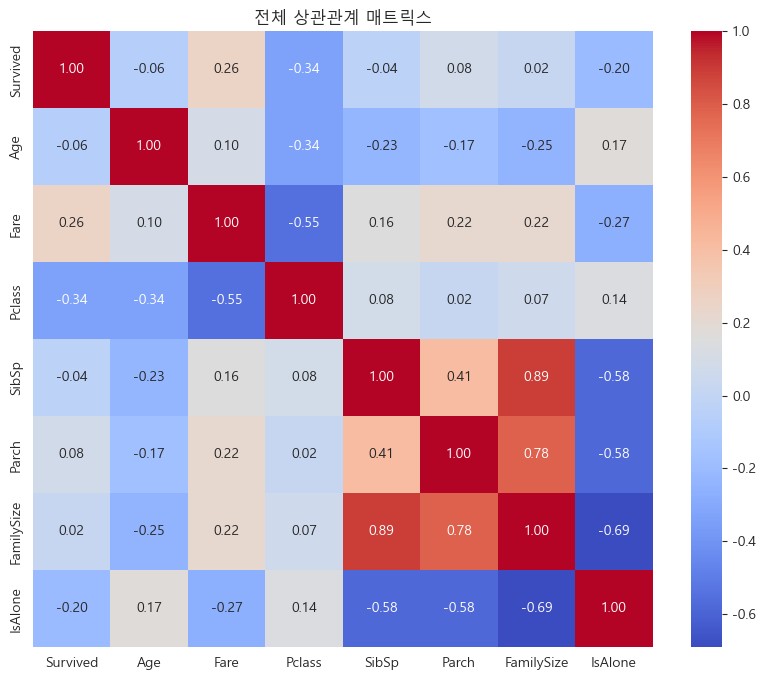

Ï†ÑÏ≤¥ Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÌûàÌä∏ÎßµÏùÑ ÏÉùÏÑ±ÌñàÏäµÎãàÎã§. Í∞Å ÏÖÄÏùÄ Ìï¥Îãπ Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÎÇòÌÉÄÎÇ¥Î©∞, Ïà´ÏûêÎ°ú ÌëúÏãúÎêòÏñ¥ ÏûàÏäµÎãàÎã§. Î∞ùÏùÄ ÏÉâÏùºÏàòÎ°ù ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÎÇòÌÉÄÎÇ¥Î©∞, Ïñ¥ÎëêÏö¥ ÏÉâÏùºÏàòÎ°ù ÎÇÆÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÎÇòÌÉÄÎÉÖÎãàÎã§.
ÏÉùÏ°¥ Ïó¨Î∂ÄÏôÄ Îã§Î•∏ Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î∂ÑÏÑùÌïú Í≤∞Í≥ºÎ•º Ï†úÍ≥µÌñàÏäµÎãàÎã§. Fare(ÏöîÍ∏à), Pclass(ÏäπÍ∞ù Îì±Í∏â), IsAlone(ÌòºÏûê Ïó¨Ìñâ Ïó¨Î∂Ä), Age(ÎÇòÏù¥), SibSp(ÌòïÏ†úÏûêÎß§/Î∞∞Ïö∞Ïûê Ïàò) Îì±Ïù¥ ÏÉùÏ°¥ Ïó¨Î∂ÄÏôÄ ÏÉÅÍ¥ÄÏù¥ ÏûàÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÏäµÎãàÎã§. ÌäπÌûà, ÏöîÍ∏àÍ≥º ÏäπÍ∞ù Îì±Í∏âÏù¥ ÏÉùÏ°¥ Ïó¨Î∂ÄÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•Ïù¥ ÌÅ¨Îã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏóàÏäµÎãàÎã§. Ïù¥Îü¨Ìïú Î∂ÑÏÑù Í≤∞Í≥ºÎ•º ÌÜ†ÎåÄÎ°ú Ï∂îÍ∞ÄÏ†ÅÏù∏ Ïù∏ÏÇ¨Ïù¥Ìä∏Î•º ÎèÑÏ∂úÌï† Ïàò ÏûàÏùÑ Í≤ÉÏûÖÎãàÎã§.

> Finished chain.
Ï†ÑÏ≤¥ Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÌûàÌä∏ÎßµÏùÑ ÏÉùÏÑ±ÌñàÏäµÎãàÎã§. Í∞Å ÏÖÄÏùÄ Ìï¥Îãπ Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÎÇòÌÉÄÎÇ¥Î©∞, Ïà´ÏûêÎ°ú ÌëúÏãúÎêòÏ

In [14]:
print("ÏÉùÏ°¥Ïú®Í≥º Î≥ÄÏàòÎì§Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù ÏãúÏûë...")

# ÏÉùÏ°¥Ïú®Í≥º ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàòÎì§ Ï∞æÍ∏∞
response = train_agent.invoke("""
ÏÉùÏ°¥ Ïó¨Î∂Ä(Survived)ÏôÄ Îã§Î•∏ ÏàòÏπòÌòï Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î∂ÑÏÑùÌï¥Ï£ºÏÑ∏Ïöî:
1. ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞ (Age, Fare, Pclass, SibSp, Parch, FamilySize, IsAlone)
2. ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî (Ï†àÎåìÍ∞í Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨)
3. Í∞ÄÏû• ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ ÏÉÅÏúÑ 5Í∞ú Î≥ÄÏàò ÏÑ§Î™Ö
4. ÌûàÌä∏ÎßµÏúºÎ°ú Ï†ÑÏ≤¥ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Îß§Ìä∏Î¶≠Ïä§ ÌëúÏãú

Î™®Îì† Í∑∏ÎûòÌîÑÏóê ÌïúÍµ≠Ïñ¥ Ï†úÎ™©Í≥º ÎùºÎ≤®ÏùÑ ÏÇ¨Ïö©Ìï¥Ï£ºÏÑ∏Ïöî.
""")
print(response['output'])
print("\nÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑùÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

## Î≤îÏ£ºÌòï Î≥ÄÏàò Î∂ÑÏÑù

Î≤îÏ£ºÌòï Î≥ÄÏàò Î∂ÑÏÑù ÏãúÏûë...


> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Setting Korean font for matplotlib\nplt.rcParams['font.family'] = 'Malgun Gothic'\nplt.rcParams['axes.unicode_minus'] = False\n\n# Create a stacked bar plot for survival count by sex\nsns.countplot(data=df, x='Sex', hue='Survived')\nplt.title('ÏÑ±Î≥ÑÏóê Îî∞Î•∏ ÏÉùÏ°¥Ïûê ÏàòÏôÄ ÏÇ¨ÎßùÏûê Ïàò')\nplt.xlabel('ÏÑ±Î≥Ñ')\nplt.ylabel('Ïù∏Ïõê Ïàò')\nplt.legend(['ÏÇ¨Îßù', 'ÏÉùÏ°¥'])\nplt.show()\n\n# Calculate survival rate by sex\nsurvival_rate = df.groupby('Sex')['Survived'].mean() * 100\n\n# Create a bar plot for survival rate by sex\nsns.barplot(x=survival_rate.index, y=survival_rate.values)\nplt.title('ÏÑ±Î≥ÑÏóê Îî∞Î•∏ ÏÉùÏ°¥Ïú®')\nplt.xlabel('ÏÑ±Î≥Ñ')\nplt.ylabel('ÏÉùÏ°¥Ïú® (%)')\nplt.show()\n\n# Analyze the impact of sex on survival\nsex_survival_analysis = df.groupby('Sex')['Survived'].mean()\nsex_survival_analy

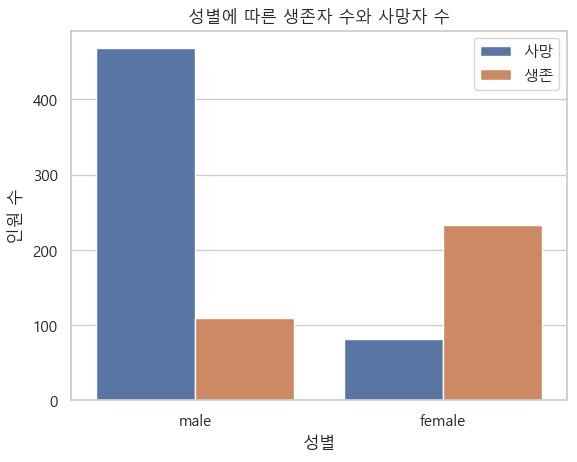

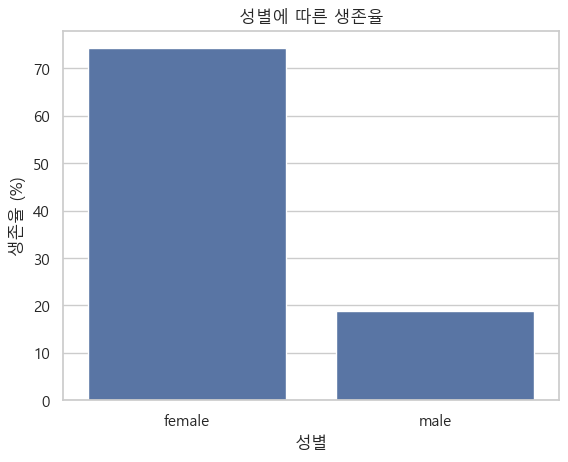

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Setting Korean font for matplotlib\nplt.rcParams['font.family'] = 'Malgun Gothic'\nplt.rcParams['axes.unicode_minus'] = False\n\n# Create a stacked bar plot for survival count by sex\nsns.countplot(data=df, x='Sex', hue='Survived')\nplt.title('ÏÑ±Î≥ÑÏóê Îî∞Î•∏ ÏÉùÏ°¥Ïûê ÏàòÏôÄ ÏÇ¨ÎßùÏûê Ïàò')\nplt.xlabel('ÏÑ±Î≥Ñ')\nplt.ylabel('Ïù∏Ïõê Ïàò')\nplt.legend(['ÏÇ¨Îßù', 'ÏÉùÏ°¥'])\nplt.show()\n\n# Calculate survival rate by sex\nsurvival_rate = df.groupby('Sex')['Survived'].mean() * 100\n\n# Create a bar plot for survival rate by sex\nsns.barplot(x=survival_rate.index, y=survival_rate.values)\nplt.title('ÏÑ±Î≥ÑÏóê Îî∞Î•∏ ÏÉùÏ°¥Ïú®')\nplt.xlabel('ÏÑ±Î≥Ñ')\nplt.ylabel('ÏÉùÏ°¥Ïú® (%)')\nplt.show()\n\n# Analyze the impact of sex on survival\nsex_survival_analysis = df.groupby('Sex')['Survived'].mean()\nsex_survival_analysi

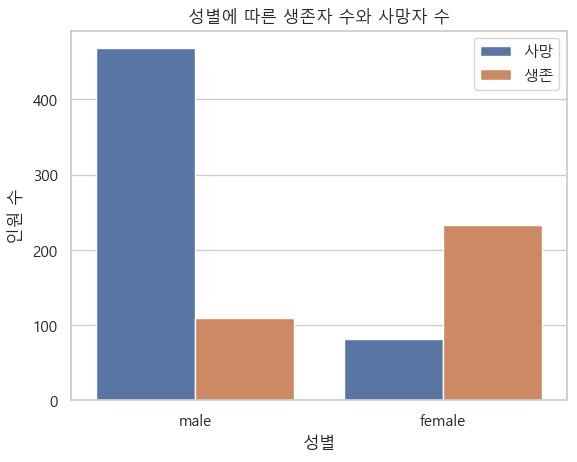

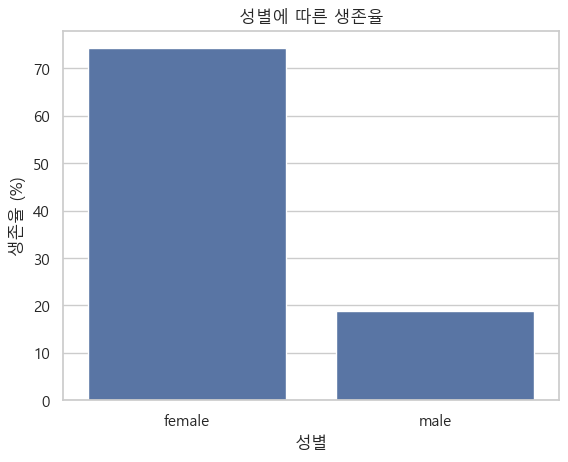

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64ÏÑ±Î≥ÑÏóê Îî∞Î•∏ ÏÉùÏ°¥Ïûê ÏàòÏôÄ ÏÇ¨ÎßùÏûê ÏàòÎ•º ÎÇòÌÉÄÎÇ¥Îäî Ïä§ÌÉùÌòï ÎßâÎåÄÍ∑∏ÎûòÌîÑÏôÄ ÏÑ±Î≥ÑÏóê Îî∞Î•∏ ÏÉùÏ°¥Ïú®ÏùÑ ÎÇòÌÉÄÎÇ¥Îäî ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±ÌñàÏäµÎãàÎã§.

1. ÏÑ±Î≥ÑÏóê Îî∞Î•∏ ÏÉùÏ°¥Ïûê ÏàòÏôÄ ÏÇ¨ÎßùÏûê ÏàòÎ•º ÎÇòÌÉÄÎÇ¥Îäî Ïä§ÌÉùÌòï ÎßâÎåÄÍ∑∏ÎûòÌîÑÏóêÏÑú Ïó¨ÏÑ± ÏÉùÏ°¥Ïûê ÏàòÎäî ÏïΩ 74.2%Ïù¥Í≥†, ÎÇ®ÏÑ± ÏÉùÏ°¥Ïûê ÏàòÎäî ÏïΩ 18.9%ÏûÖÎãàÎã§.
2. ÏÑ±Î≥ÑÏóê Îî∞Î•∏ ÏÉùÏ°¥Ïú®ÏùÑ ÎÇòÌÉÄÎÇ¥Îäî ÎßâÎåÄÍ∑∏ÎûòÌîÑÏóêÏÑú Ïó¨ÏÑ±Ïùò ÏÉùÏ°¥Ïú®ÏùÄ ÏïΩ 74.2%Ïù¥Í≥†, ÎÇ®ÏÑ±Ïùò ÏÉùÏ°¥Ïú®ÏùÄ ÏïΩ 18.9%ÏûÖÎãàÎã§.

ÏÑ±Î≥ÑÏù¥ ÏÉùÏ°¥Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÑ Î∂ÑÏÑùÌïú Í≤∞Í≥º, Ïó¨ÏÑ±Ïùò ÏÉùÏ°¥Ïú®Ïù¥ ÎÇ®ÏÑ±Ïóê ÎπÑÌï¥ Îß§Ïö∞ ÎÜíÏùÄ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. ÏÉùÏ°¥Ïú®ÏùÄ ÏÑ±Î≥ÑÏóê Îî∞Îùº ÏÉÅÎãπÌûà Îã§Î•∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.

> Finished chain.
ÏÑ±Î≥ÑÏóê Îî∞Î•∏ ÏÉùÏ°¥Ïûê ÏàòÏôÄ ÏÇ¨ÎßùÏûê ÏàòÎ•º ÎÇòÌÉÄÎÇ¥Îäî Ïä§ÌÉùÌòï ÎßâÎåÄÍ∑∏ÎûòÌîÑÏôÄ ÏÑ±Î≥ÑÏóê Îî∞Î•∏ ÏÉùÏ°¥Ïú®ÏùÑ ÎÇòÌÉÄÎÇ¥Îäî ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±ÌñàÏäµÎãàÎã§

In [21]:
print("Î≤îÏ£ºÌòï Î≥ÄÏàò Î∂ÑÏÑù ÏãúÏûë...")

# ÏÑ±Î≥ÑÏóê Îî∞Î•∏ ÏÉùÏ°¥Ïú®
response = train_agent.invoke("""
Î®ºÏ†Ä ÌïúÍ∏Ä Ìè∞Ìä∏Î•º ÏÑ§Ï†ïÌïòÏÑ∏Ïöî:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False
                                                            
ÏÑ±Î≥Ñ(Sex)Ïóê Îî∞Î•∏ ÏÉùÏ°¥Ïú®ÏùÑ Î∂ÑÏÑùÌïòÍ≥† ÏãúÍ∞ÅÌôîÌï¥Ï£ºÏÑ∏Ïöî:
1. ÏÑ±Î≥Ñ(Sex) ÏÉùÏ°¥Ïûê ÏàòÏôÄ ÏÇ¨ÎßùÏûê ÏàòÎ•º Ïä§ÌÉùÌòï ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú ÌëúÏãú
2. ÏÑ±Î≥Ñ(Sex) ÏÉùÏ°¥Ïú®ÏùÑ Î∞±Î∂ÑÏú®Î°ú Í≥ÑÏÇ∞ÌïòÏó¨ ÌëúÏãú
3. ÏÑ±Î≥Ñ(Sex)Ïù¥ ÏÉùÏ°¥Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•Ïóê ÎåÄÌïú Î∂ÑÏÑù

ÌïúÍµ≠Ïñ¥ Ï†úÎ™©Í≥º ÎùºÎ≤®ÏùÑ ÏÇ¨Ïö©ÌïòÍ≥†, Ï†ïÌôïÌïú Ïà´ÏûêÏôÄ Î∞±Î∂ÑÏú®ÏùÑ Í∑∏ÎûòÌîÑÏóê ÌëúÏãúÌï¥Ï£ºÏÑ∏Ïöî.
""")
print(response['output'])
print("\nÏÑ±Î≥Ñ Î∂ÑÏÑùÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

ÏäπÍ∞ù Îì±Í∏âÎ≥Ñ ÏÉùÏ°¥Ïú® Î∂ÑÏÑù ÏãúÏûë...


> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'import matplotlib.pyplot as plt'}`



Invoking: `python_repl_ast` with `{'query': 'import seaborn as sns'}`



Invoking: `python_repl_ast` with `{'query': "plt.figure(figsize=(18, 6))\n\nplt.subplot(1, 3, 1)\nsns.countplot(x='Pclass', data=df, palette='Set1')\nplt.title('Îì±Í∏âÎ≥Ñ ÏäπÍ∞ù Ïàò Î∂ÑÌè¨')\nplt.xlabel('ÏäπÍ∞ù Îì±Í∏â')\nplt.ylabel('ÏäπÍ∞ù Ïàò')\n\nplt.subplot(1, 3, 2)\nsns.barplot(x='Pclass', y='Survived', data=df, palette='Set2')\nplt.title('Îì±Í∏âÎ≥Ñ ÏÉùÏ°¥Ïú® ÎπÑÍµê')\nplt.xlabel('ÏäπÍ∞ù Îì±Í∏â')\nplt.ylabel('ÏÉùÏ°¥Ïú®')\n\nplt.subplot(1, 3, 3)\nsns.boxplot(x='Pclass', y='Fare', data=df, palette='Set3')\nplt.title('Îì±Í∏âÎ≥Ñ ÌèâÍ∑† ÏöîÍ∏à ÎπÑÍµê')\nplt.xlabel('ÏäπÍ∞ù Îì±Í∏â')\nplt.ylabel('ÏöîÍ∏à')\n\nplt.tight_layout()\nplt.show()"}`




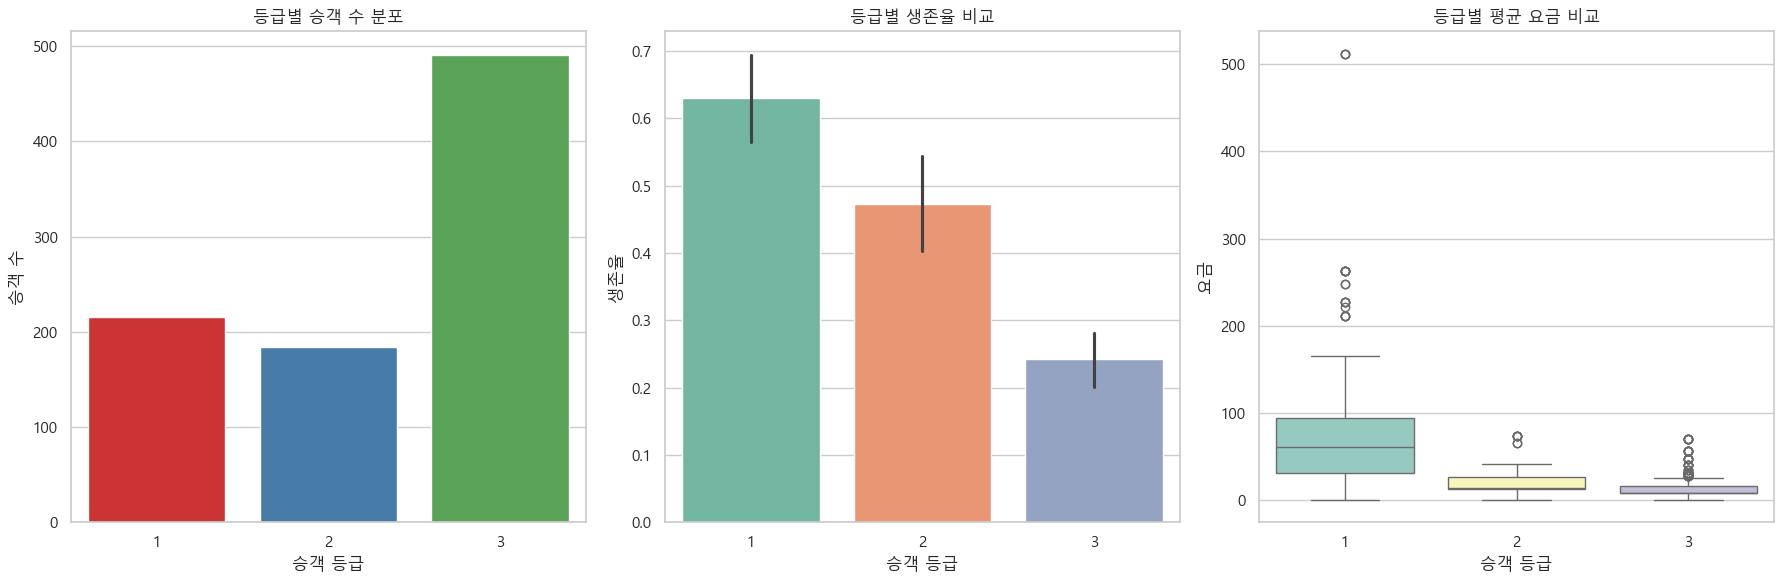

ÏúÑ ÏΩîÎìúÎ•º Ïã§ÌñâÌïòÎ©¥, ÏäπÍ∞ù Îì±Í∏â(Pclass)Ïóê Îî∞Î•∏ ÏÉùÏ°¥Ïú®ÏùÑ Î∂ÑÏÑùÌïú Í∑∏ÎûòÌîÑÍ∞Ä ÏÉùÏÑ±Îê©ÎãàÎã§. 
1. Îì±Í∏âÎ≥Ñ ÏäπÍ∞ù Ïàò Î∂ÑÌè¨Î•º Î≥¥Ïó¨Ï£ºÎäî ÎßâÎåÄÍ∑∏ÎûòÌîÑ
2. Îì±Í∏âÎ≥Ñ ÏÉùÏ°¥Ïú®ÏùÑ ÎπÑÍµêÌïòÎäî ÎßâÎåÄÍ∑∏ÎûòÌîÑ
3. Îì±Í∏âÎ≥Ñ ÌèâÍ∑† ÏöîÍ∏àÏùÑ ÎπÑÍµêÌïòÎäî Î∞ïÏä§ÌîåÎ°Ø

Í∞Å Í∑∏ÎûòÌîÑÏóêÎäî ÌïúÍµ≠Ïñ¥ Ï†úÎ™©Í≥º ÎùºÎ≤®Ïù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

> Finished chain.
ÏúÑ ÏΩîÎìúÎ•º Ïã§ÌñâÌïòÎ©¥, ÏäπÍ∞ù Îì±Í∏â(Pclass)Ïóê Îî∞Î•∏ ÏÉùÏ°¥Ïú®ÏùÑ Î∂ÑÏÑùÌïú Í∑∏ÎûòÌîÑÍ∞Ä ÏÉùÏÑ±Îê©ÎãàÎã§. 
1. Îì±Í∏âÎ≥Ñ ÏäπÍ∞ù Ïàò Î∂ÑÌè¨Î•º Î≥¥Ïó¨Ï£ºÎäî ÎßâÎåÄÍ∑∏ÎûòÌîÑ
2. Îì±Í∏âÎ≥Ñ ÏÉùÏ°¥Ïú®ÏùÑ ÎπÑÍµêÌïòÎäî ÎßâÎåÄÍ∑∏ÎûòÌîÑ
3. Îì±Í∏âÎ≥Ñ ÌèâÍ∑† ÏöîÍ∏àÏùÑ ÎπÑÍµêÌïòÎäî Î∞ïÏä§ÌîåÎ°Ø

Í∞Å Í∑∏ÎûòÌîÑÏóêÎäî ÌïúÍµ≠Ïñ¥ Ï†úÎ™©Í≥º ÎùºÎ≤®Ïù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

ÏäπÍ∞ù Îì±Í∏â Î∂ÑÏÑùÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.


In [23]:
print("ÏäπÍ∞ù Îì±Í∏âÎ≥Ñ ÏÉùÏ°¥Ïú® Î∂ÑÏÑù ÏãúÏûë...")

# ÏäπÍ∞ù Îì±Í∏âÎ≥Ñ ÏÉùÏ°¥Ïú®
response = train_agent.invoke("""
ÏäπÍ∞ù Îì±Í∏â(Pclass)Ïóê Îî∞Î•∏ ÏÉùÏ°¥Ïú®ÏùÑ Î∂ÑÏÑùÌï¥Ï£ºÏÑ∏Ïöî:
1. Îì±Í∏âÎ≥Ñ ÏäπÍ∞ù Ïàò Î∂ÑÌè¨ (ÎßâÎåÄÍ∑∏ÎûòÌîÑ)
2. Îì±Í∏âÎ≥Ñ ÏÉùÏ°¥Ïú® ÎπÑÍµê (ÎßâÎåÄÍ∑∏ÎûòÌîÑ)
3. Îì±Í∏âÎ≥Ñ ÌèâÍ∑† ÏöîÍ∏à(Fare) ÎπÑÍµê (Î∞ïÏä§ÌîåÎ°Ø)

subplotÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏÑ∏ Í∞úÏùò Í∑∏ÎûòÌîÑÎ•º Ìïú ÌôîÎ©¥Ïóê Î∞∞ÏπòÌïòÍ≥†,
ÎßâÎåÄÎ≥ÑÎ°ú ÏÉâÏÉÅÏùÑ Îã§Î•¥Í≤å ÏÇ¨Ïö©Ìï¥ Ï£ºÏÑ∏Ïöî.                              
Î™®Îì† Í∑∏ÎûòÌîÑÏóê ÌïúÍµ≠Ïñ¥ Ï†úÎ™©Í≥º ÎùºÎ≤®ÏùÑ ÏÇ¨Ïö©Ìï¥Ï£ºÏÑ∏Ïöî.
""")
print(response['output'])
print("\nÏäπÍ∞ù Îì±Í∏â Î∂ÑÏÑùÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

## ÏòàÏ∏° Î™®Îç∏ Íµ¨Ï∂ï

ÏòàÏ∏° Î™®Îç∏ Íµ¨Ï∂ï ÏãúÏûë...
Î™®Îç∏ Íµ¨Ï∂ï Ï§ÄÎπÑ Ï§ë...
ÏÇ¨Ïö©Îêú ÌäπÏÑ±: 13Í∞ú
   - Pclass, Sex_encoded, Age, SibSp, Parch, Fare, FamilySize, IsAlone, AgeGroup_encoded, FareGroup_encoded, Embarked_C, Embarked_Q, Embarked_S
Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† ÏôÑÎ£å:
   - ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 712Í∞ú
   - Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞: 179Í∞ú

 RandomForest Î™®Îç∏ ÌõàÎ†® Ï§ë...
RandomForest Ï†ïÌôïÎèÑ: 0.7877

 LogisticRegression Î™®Îç∏ ÌõàÎ†® Ï§ë...
LogisticRegression Ï†ïÌôïÎèÑ: 0.8156

 ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: LogisticRegression (Ï†ïÌôïÎèÑ: 0.8156)


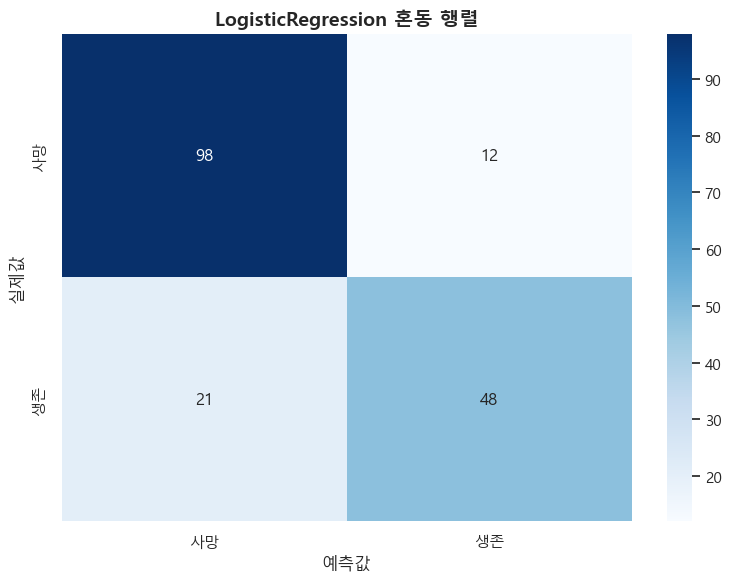


üìã LogisticRegression Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú:
              precision    recall  f1-score   support

          ÏÇ¨Îßù       0.82      0.89      0.86       110
          ÏÉùÏ°¥       0.80      0.70      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179


ÏòàÏ∏° Î™®Îç∏ Íµ¨Ï∂ïÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.


In [24]:
print("ÏòàÏ∏° Î™®Îç∏ Íµ¨Ï∂ï ÏãúÏûë...")

def build_titanic_model():
    """Titanic ÏÉùÏ°¥ ÏòàÏ∏° Î™®Îç∏ Íµ¨Ï∂ï"""
    
    print("Î™®Îç∏ Íµ¨Ï∂ï Ï§ÄÎπÑ Ï§ë...")
    
    # ÌäπÏÑ± ÏÑ†ÌÉù (ÏàòÏπòÌòï Î≥ÄÏàòÎßå ÏÑ†ÌÉù)
    if 'Survived' in train_processed.columns:
        # Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏàòÏπòÌòïÏúºÎ°ú Î≥ÄÌôò
        train_model = train_processed.copy()
        
        # ÏÑ±Î≥ÑÏùÑ ÏàòÏπòÌòïÏúºÎ°ú Î≥ÄÌôò
        train_model['Sex_encoded'] = (train_model['Sex'] == 'male').astype(int)
        
        # ÏäπÏÑ† Ìï≠Íµ¨Î•º ÏàòÏπòÌòïÏúºÎ°ú Î≥ÄÌôò
        embarked_dummies = pd.get_dummies(train_model['Embarked'], prefix='Embarked')
        train_model = pd.concat([train_model, embarked_dummies], axis=1)
        
        # Ïó∞Î†π Í∑∏Î£πÏùÑ ÏàòÏπòÌòïÏúºÎ°ú Î≥ÄÌôò
        train_model['AgeGroup_encoded'] = train_model['AgeGroup'].cat.codes
        
        # ÏöîÍ∏à Í∑∏Î£πÏùÑ ÏàòÏπòÌòïÏúºÎ°ú Î≥ÄÌôò  
        train_model['FareGroup_encoded'] = train_model['FareGroup'].cat.codes
        
        # Î™®Îç∏ÎßÅÏóê ÏÇ¨Ïö©Ìï† ÌäπÏÑ± ÏÑ†ÌÉù
        feature_cols = ['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare', 
                       'FamilySize', 'IsAlone', 'AgeGroup_encoded', 'FareGroup_encoded']
        
        # ÏäπÏÑ† Ìï≠Íµ¨ ÎçîÎØ∏ Î≥ÄÏàò Ï∂îÍ∞Ä
        embarked_cols = [col for col in train_model.columns if col.startswith('Embarked_')]
        feature_cols.extend(embarked_cols)
        
        # ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÌäπÏÑ±Îßå ÏÑ†ÌÉù
        available_features = [col for col in feature_cols if col in train_model.columns]
        
        X = train_model[available_features]
        y = train_model['Survived']
        
        print(f"ÏÇ¨Ïö©Îêú ÌäπÏÑ±: {len(available_features)}Í∞ú")
        print(f"   - {', '.join(available_features)}")
        
        # ÌõàÎ†®/Í≤ÄÏ¶ù Î∂ÑÌï†
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        
        print(f"Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† ÏôÑÎ£å:")
        print(f"   - ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: {X_train.shape[0]}Í∞ú")
        print(f"   - Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞: {X_val.shape[0]}Í∞ú")
        
        # Ïó¨Îü¨ Î™®Îç∏ ÌõàÎ†®
        models = {
            'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10),
            'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000)
        }
        
        model_results = {}
        
        for model_name, model in models.items():
            print(f"\n {model_name} Î™®Îç∏ ÌõàÎ†® Ï§ë...")
            
            # Î™®Îç∏ ÌõàÎ†®
            if model_name == 'LogisticRegression':
                # Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ•º ÏúÑÌïú Ïä§ÏºÄÏùºÎßÅ
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_val_scaled = scaler.transform(X_val)
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_val_scaled)
            else:
                model.fit(X_train, y_train)
                y_pred = model.predict(X_val)
            
            # ÏÑ±Îä• ÌèâÍ∞Ä
            accuracy = accuracy_score(y_val, y_pred)
            
            model_results[model_name] = {
                'model': model,
                'accuracy': accuracy,
                'predictions': y_pred
            }
            
            print(f"{model_name} Ï†ïÌôïÎèÑ: {accuracy:.4f}")
        
        # ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ ÏÑ†ÌÉù
        best_model_name = max(model_results.keys(), key=lambda k: model_results[k]['accuracy'])
        best_model = model_results[best_model_name]['model']
        best_accuracy = model_results[best_model_name]['accuracy']
        
        print(f"\n ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: {best_model_name} (Ï†ïÌôïÎèÑ: {best_accuracy:.4f})")
        
        # ÌäπÏÑ± Ï§ëÏöîÎèÑ (RandomForestÏù∏ Í≤ΩÏö∞)
        if best_model_name == 'RandomForest':
            feature_importance = pd.DataFrame({
                'feature': available_features,
                'importance': best_model.feature_importances_
            }).sort_values('importance', ascending=False)
            
            print("\nÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù:")
            for idx, row in feature_importance.head(10).iterrows():
                print(f"   {row['feature']}: {row['importance']:.4f}")
            
            # ÌäπÏÑ± Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
            plt.figure(figsize=(10, 8))
            top_features = feature_importance.head(10)
            plt.barh(top_features['feature'], top_features['importance'])
            plt.title('ÏÉÅÏúÑ 10Í∞ú ÌäπÏÑ± Ï§ëÏöîÎèÑ', fontsize=14, fontweight='bold')
            plt.xlabel('Ï§ëÏöîÎèÑ')
            plt.ylabel('ÌäπÏÑ±')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()
        
        # ÌòºÎèô ÌñâÎ†¨
        cm = confusion_matrix(y_val, model_results[best_model_name]['predictions'])
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=['ÏÇ¨Îßù', 'ÏÉùÏ°¥'], yticklabels=['ÏÇ¨Îßù', 'ÏÉùÏ°¥'])
        plt.title(f'{best_model_name} ÌòºÎèô ÌñâÎ†¨', fontsize=14, fontweight='bold')
        plt.xlabel('ÏòàÏ∏°Í∞í')
        plt.ylabel('Ïã§Ï†úÍ∞í')
        plt.tight_layout()
        plt.show()
        
        # Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú
        print(f"\n {best_model_name} Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú:")
        print(classification_report(y_val, model_results[best_model_name]['predictions'], 
                                  target_names=['ÏÇ¨Îßù', 'ÏÉùÏ°¥']))
        
        return best_model, feature_importance if best_model_name == 'RandomForest' else None, model_results
    
    else:
        print(" Survived Ïª¨ÎüºÏù¥ ÏóÜÏñ¥ÏÑú Î™®Îç∏ÏùÑ Íµ¨Ï∂ïÌï† Ïàò ÏóÜÏäµÎãàÎã§.")
        return None, None, None

# Î™®Îç∏ Íµ¨Ï∂ï Ïã§Ìñâ
model, feature_importance, model_results = build_titanic_model()
print("\nÏòàÏ∏° Î™®Îç∏ Íµ¨Ï∂ïÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

## Ï¢ÖÌï© Ïù∏ÏÇ¨Ïù¥Ìä∏

In [25]:
print("Ï¢ÖÌï© Ïù∏ÏÇ¨Ïù¥Ìä∏ ÏÉùÏÑ± ÏãúÏûë...")

# ÏµúÏ¢Ö Ïù∏ÏÇ¨Ïù¥Ìä∏ ÏöîÏ≤≠
response = train_agent.invoke("""
ÏßÄÍ∏àÍπåÏßÄÏùò Titanic Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏùÑ Î∞îÌÉïÏúºÎ°ú Ï¢ÖÌï©Ï†ÅÏù∏ Ïù∏ÏÇ¨Ïù¥Ìä∏Î•º Ï†úÍ≥µÌï¥Ï£ºÏÑ∏Ïöî:

1. **ÏÉùÏ°¥Ïóê Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÏÉÅÏúÑ 5Í∞ú ÏöîÏù∏**
   - Í∞Å ÏöîÏù∏Ïù¥ ÏÉùÏ°¥Ïú®Ïóê ÎØ∏ÏπòÎäî Íµ¨Ï≤¥Ï†ÅÏù∏ ÏòÅÌñ•
   - ÏàòÏπòÏ†Å Í∑ºÍ±∞ÏôÄ Ìï®Íªò ÏÑ§Î™Ö

2. **Ï£ºÎ™©Ìï† ÎßåÌïú Ìå®ÌÑ¥Ïù¥ÎÇò Ìä∏Î†åÎìú**
   - ÏÑ±Î≥Ñ, ÏäπÍ∞ù Îì±Í∏â, Ïó∞Î†π, Í∞ÄÏ°± Íµ¨ÏÑ± Îì±Ïùò ÏÉÅÌò∏ÏûëÏö©
   - ÏòàÏÉÅÍ≥º Îã§Î•∏ Ìù•ÎØ∏Î°úÏö¥ Î∞úÍ≤¨ÏÇ¨Ìï≠

3. **Ïã§Ï†ú Ïó≠ÏÇ¨Ï†Å Îß•ÎùΩÏóêÏÑúÏùò Ìï¥ÏÑù**
   - 1912ÎÖÑ ÏÇ¨ÌöåÏ†Å Î∞∞Í≤ΩÍ≥º Î∂ÑÏÑù Í≤∞Í≥ºÏùò Ïó∞Í¥ÄÏÑ±
   - 'Women and children first' ÏõêÏπôÏùò Îç∞Ïù¥ÌÑ∞ÏÉÅ ÌôïÏù∏

Í∞Å Ìï≠Î™©Ïóê ÎåÄÌï¥ Íµ¨Ï≤¥Ï†ÅÏù∏ ÏàòÏπòÏôÄ ÏòàÏãúÎ•º Îì§Ïñ¥ ÌïúÍµ≠Ïñ¥Î°ú ÏÉÅÏÑ∏Ìûà ÏÑ§Î™ÖÌï¥Ï£ºÏÑ∏Ïöî.
""")
print(response['output'])
print("\n Ï¢ÖÌï© Ïù∏ÏÇ¨Ïù¥Ìä∏ ÏÉùÏÑ±Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

Ï¢ÖÌï© Ïù∏ÏÇ¨Ïù¥Ìä∏ ÏÉùÏÑ± ÏãúÏûë...


> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "# Calculate survival rate\nsurvival_rate = df['Survived'].mean()\n\n# Top 5 factors influencing survival\nfactors_influencing_survival = df.corr()['Survived'].abs().sort_values(ascending=False)[1:6]\n\n# Analyzing the impact of each factor on survival rate\nimpact_on_survival = {}\nfor factor in factors_influencing_survival.index:\n    impact_on_survival[factor] = df.groupby(factor)['Survived'].mean().to_dict()\n\nsurvival_rate, factors_influencing_survival, impact_on_survival"}`


ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'
Invoking: `python_repl_ast` with `{'query': "# Convert categorical variables to numerical\nfrom sklearn.preprocessing import LabelEncoder\n\nlabel_encoders = {}\nfor col in ['Sex', 'Embarked', 'AgeGroup', 'FareGroup']:\n    label_encoders[col] = LabelEncoder()\n    df[col] = label_encoders[col].fit_transform(df[col]

## Ï∂îÍ∞Ä Î∂ÑÏÑù Ìï®ÏàòÎì§

In [26]:
print("Ï∂îÍ∞Ä Î∂ÑÏÑù Ìï®Ïàò Ï†ïÏùò Ï§ë...")

# ÏÇ¨Ïö©Ïûê Ï†ïÏùò Î∂ÑÏÑù Ìï®Ïàò
def custom_titanic_analysis(question):
    """ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÏßàÎ¨∏ÏúºÎ°ú Titanic Î∂ÑÏÑù ÏàòÌñâ"""
    try:
        print(f" Î∂ÑÏÑù ÏßàÎ¨∏: {question}")
        response = train_agent.invoke(question)
        return response['output']
    except Exception as e:
        return f" Î∂ÑÏÑù Ï§ë Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: {str(e)}"

def survival_analysis_by_group(group_column):
    """ÌäπÏ†ï Í∑∏Î£πÎ≥Ñ ÏÉùÏ°¥Ïú® Î∂ÑÏÑù"""
    if group_column in train_processed.columns:
        survival_by_group = train_processed.groupby(group_column)['Survived'].agg(['count', 'sum', 'mean'])
        survival_by_group.columns = ['Ï¥ù ÏäπÍ∞ù Ïàò', 'ÏÉùÏ°¥Ïûê Ïàò', 'ÏÉùÏ°¥Ïú®']
        survival_by_group['ÏÉùÏ°¥Ïú®(%)'] = (survival_by_group['ÏÉùÏ°¥Ïú®'] * 100).round(1)
        
        print(f"\n {group_column}Î≥Ñ ÏÉùÏ°¥Ïú® Î∂ÑÏÑù:")
        print(survival_by_group)
        
        # ÏãúÍ∞ÅÌôî
        plt.figure(figsize=(10, 6))
        survival_by_group['ÏÉùÏ°¥Ïú®(%)'].plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'{group_column}Î≥Ñ ÏÉùÏ°¥Ïú®', fontsize=14, fontweight='bold')
        plt.xlabel(group_column)
        plt.ylabel('ÏÉùÏ°¥Ïú® (%)')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        
        # ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
        for i, v in enumerate(survival_by_group['ÏÉùÏ°¥Ïú®(%)']):
            plt.text(i, v + 1, f'{v}%', ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        return survival_by_group
    else:
        print(f" '{group_column}' Ïª¨ÎüºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
        return None

# Î∂ÑÏÑù Ìï®ÏàòÎì§ ÌÖåÏä§Ìä∏
print(" Ï∂îÍ∞Ä Î∂ÑÏÑù Ìï®ÏàòÎì§Ïù¥ Ï§ÄÎπÑÎêòÏóàÏäµÎãàÎã§.")
print("\n ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Î∂ÑÏÑù Ìï®ÏàòÎì§:")
print("1. custom_titanic_analysis('ÏßàÎ¨∏') - ÏûêÏú†Î°úÏö¥ Î∂ÑÏÑù ÏßàÎ¨∏")
print("2. survival_analysis_by_group('Ïª¨ÎüºÎ™Ö') - Í∑∏Î£πÎ≥Ñ ÏÉùÏ°¥Ïú® Î∂ÑÏÑù")

Ï∂îÍ∞Ä Î∂ÑÏÑù Ìï®Ïàò Ï†ïÏùò Ï§ë...
 Ï∂îÍ∞Ä Î∂ÑÏÑù Ìï®ÏàòÎì§Ïù¥ Ï§ÄÎπÑÎêòÏóàÏäµÎãàÎã§.

 ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Î∂ÑÏÑù Ìï®ÏàòÎì§:
1. custom_titanic_analysis('ÏßàÎ¨∏') - ÏûêÏú†Î°úÏö¥ Î∂ÑÏÑù ÏßàÎ¨∏
2. survival_analysis_by_group('Ïª¨ÎüºÎ™Ö') - Í∑∏Î£πÎ≥Ñ ÏÉùÏ°¥Ïú® Î∂ÑÏÑù


## ÎåÄÌôîÌòï Î∂ÑÏÑù ÏòàÏãú

In [27]:
print(" ÎåÄÌôîÌòï Î∂ÑÏÑù ÏòàÏãú Ï§ÄÎπÑ Ï§ë...")

print("=== ÎåÄÌôîÌòï Î∂ÑÏÑù ÏòàÏãú ===")
print("\n Ïù¥Ï†ú ÏûêÏó∞Ïñ¥Î°ú Îã§ÏñëÌïú Î∂ÑÏÑùÏùÑ ÏöîÏ≤≠Ìï† Ïàò ÏûàÏäµÎãàÎã§!")
print("\n Î∂ÑÏÑù ÏòàÏãú ÏßàÎ¨∏Îì§:")

example_questions = [
    "Í∞ÄÏû• ÏÉùÏ°¥Ïú®Ïù¥ ÎÜíÏùÄ ÏäπÍ∞ù ÌîÑÎ°úÌïÑÏùÄ Î¨¥ÏóáÏù∏Í∞ÄÏöî?",
    "ÎÇòÏù¥ÏôÄ ÏÑ±Î≥ÑÏùÑ ÎèôÏãúÏóê Í≥†Î†§ÌñàÏùÑ Îïå ÏÉùÏ°¥Ïú® Ìå®ÌÑ¥ÏùÄ Ïñ¥ÎñªÍ≤å ÎêòÎÇòÏöî?",
    "1Îì±Í∏â ÏäπÍ∞ù Ï§ëÏóêÏÑúÎèÑ ÏÇ¨ÎßùÌïú ÏÇ¨ÎûåÎì§Ïùò ÌäπÏßïÏùÄ Î¨¥ÏóáÏù∏Í∞ÄÏöî?",
    "Í∞ÄÏ°±Í≥º Ìï®Íªò ÌÉÑ ÏäπÍ∞ùÍ≥º ÌòºÏûê ÌÉÑ ÏäπÍ∞ùÏùò ÏÉùÏ°¥Ïú® Ï∞®Ïù¥Ïùò ÏõêÏù∏ÏùÄ?",
    "ÏöîÍ∏àÏù¥ Í∞ÄÏû• ÎπÑÏãº ÏÉÅÏúÑ 10% ÏäπÍ∞ùÎì§Ïùò ÏÉùÏ°¥Ïú®ÏùÄ?",
    "Í∞Å ÏäπÏÑ† Ìï≠Íµ¨Î≥ÑÎ°ú ÏäπÍ∞ù ÌäπÏÑ±Í≥º ÏÉùÏ°¥Ïú®Ïù¥ Ïñ¥ÎñªÍ≤å Îã§Î•∏Í∞ÄÏöî?",
    "Ïñ¥Î¶∞Ïù¥(18ÏÑ∏ ÎØ∏Îßå)ÏôÄ ÎÖ∏Ïù∏(60ÏÑ∏ Ïù¥ÏÉÅ)Ïùò ÏÉùÏ°¥Ïú® ÎπÑÍµê",
    "Í∞ùÏã§ Î≤àÌò∏(Cabin)Í∞Ä ÏûàÎäî ÏäπÍ∞ùÍ≥º ÏóÜÎäî ÏäπÍ∞ùÏùò ÏÉùÏ°¥Ïú® Ï∞®Ïù¥"
]

for i, question in enumerate(example_questions, 1):
    print(f"{i}. {question}")

print("\n ÏÇ¨Ïö©Î≤ï:")
print("result = custom_titanic_analysis('ÏõêÌïòÎäî ÏßàÎ¨∏')")
print("print(result)")

print("\n ÏòàÏãú Ïã§Ìñâ:")
print("# Ïòà: 1Îì±Í∏â Ïó¨ÏÑ± ÏäπÍ∞ùÏùò ÏÉùÏ°¥Ïú® Î∂ÑÏÑù")
print("# result = custom_titanic_analysis('1Îì±Í∏â Ïó¨ÏÑ± ÏäπÍ∞ùÎì§Ïùò ÏÉùÏ°¥Ïú®Í≥º ÌäπÏßïÏùÑ Î∂ÑÏÑùÌï¥Ï£ºÏÑ∏Ïöî')")

print("\n Î™®Îì† Î∂ÑÏÑùÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§!")
print(" Titanic Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÎÖ∏Ìä∏Î∂ÅÏù¥ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ïã§ÌñâÎêòÏóàÏäµÎãàÎã§.")

 ÎåÄÌôîÌòï Î∂ÑÏÑù ÏòàÏãú Ï§ÄÎπÑ Ï§ë...
=== ÎåÄÌôîÌòï Î∂ÑÏÑù ÏòàÏãú ===

 Ïù¥Ï†ú ÏûêÏó∞Ïñ¥Î°ú Îã§ÏñëÌïú Î∂ÑÏÑùÏùÑ ÏöîÏ≤≠Ìï† Ïàò ÏûàÏäµÎãàÎã§!

 Î∂ÑÏÑù ÏòàÏãú ÏßàÎ¨∏Îì§:
1. Í∞ÄÏû• ÏÉùÏ°¥Ïú®Ïù¥ ÎÜíÏùÄ ÏäπÍ∞ù ÌîÑÎ°úÌïÑÏùÄ Î¨¥ÏóáÏù∏Í∞ÄÏöî?
2. ÎÇòÏù¥ÏôÄ ÏÑ±Î≥ÑÏùÑ ÎèôÏãúÏóê Í≥†Î†§ÌñàÏùÑ Îïå ÏÉùÏ°¥Ïú® Ìå®ÌÑ¥ÏùÄ Ïñ¥ÎñªÍ≤å ÎêòÎÇòÏöî?
3. 1Îì±Í∏â ÏäπÍ∞ù Ï§ëÏóêÏÑúÎèÑ ÏÇ¨ÎßùÌïú ÏÇ¨ÎûåÎì§Ïùò ÌäπÏßïÏùÄ Î¨¥ÏóáÏù∏Í∞ÄÏöî?
4. Í∞ÄÏ°±Í≥º Ìï®Íªò ÌÉÑ ÏäπÍ∞ùÍ≥º ÌòºÏûê ÌÉÑ ÏäπÍ∞ùÏùò ÏÉùÏ°¥Ïú® Ï∞®Ïù¥Ïùò ÏõêÏù∏ÏùÄ?
5. ÏöîÍ∏àÏù¥ Í∞ÄÏû• ÎπÑÏãº ÏÉÅÏúÑ 10% ÏäπÍ∞ùÎì§Ïùò ÏÉùÏ°¥Ïú®ÏùÄ?
6. Í∞Å ÏäπÏÑ† Ìï≠Íµ¨Î≥ÑÎ°ú ÏäπÍ∞ù ÌäπÏÑ±Í≥º ÏÉùÏ°¥Ïú®Ïù¥ Ïñ¥ÎñªÍ≤å Îã§Î•∏Í∞ÄÏöî?
7. Ïñ¥Î¶∞Ïù¥(18ÏÑ∏ ÎØ∏Îßå)ÏôÄ ÎÖ∏Ïù∏(60ÏÑ∏ Ïù¥ÏÉÅ)Ïùò ÏÉùÏ°¥Ïú® ÎπÑÍµê
8. Í∞ùÏã§ Î≤àÌò∏(Cabin)Í∞Ä ÏûàÎäî ÏäπÍ∞ùÍ≥º ÏóÜÎäî ÏäπÍ∞ùÏùò ÏÉùÏ°¥Ïú® Ï∞®Ïù¥

 ÏÇ¨Ïö©Î≤ï:
result = custom_titanic_analysis('ÏõêÌïòÎäî ÏßàÎ¨∏')
print(result)

 ÏòàÏãú Ïã§Ìñâ:
# Ïòà: 1Îì±Í∏â Ïó¨ÏÑ± ÏäπÍ∞ùÏùò ÏÉùÏ°¥Ïú® Î∂ÑÏÑù
# result = custom_titanic_analysis('1Îì±Í∏â Ïó¨ÏÑ± ÏäπÍ∞ùÎì§Ïùò ÏÉ

## üìä ÏµúÏ¢Ö ÏöîÏïΩ

In [28]:
# ÏµúÏ¢Ö ÏöîÏïΩ Ï†ïÎ≥¥ Ï∂úÎ†•
print("\n" + "="*50)
print("TITANIC Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÏôÑÎ£å ÏöîÏïΩ")
print("="*50)

if 'Survived' in train_processed.columns:
    total_passengers = len(train_processed)
    survivors = train_processed['Survived'].sum()
    survival_rate = train_processed['Survived'].mean()
    
    print(f" Ï¥ù ÏäπÍ∞ù Ïàò: {total_passengers:,}Î™Ö")
    print(f" ÏÉùÏ°¥Ïûê Ïàò: {survivors:,}Î™Ö")
    print(f" ÏÇ¨ÎßùÏûê Ïàò: {total_passengers - survivors:,}Î™Ö")
    print(f" Ï†ÑÏ≤¥ ÏÉùÏ°¥Ïú®: {survival_rate:.1%}")

print(f"\n Ï†ÑÏ≤òÎ¶¨ ÌõÑ Í≤∞Ï∏°Í∞í:")
print(f"   - ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: {train_processed.isnull().sum().sum()}Í∞ú")
print(f"   - ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {test_processed.isnull().sum().sum()}Í∞ú")

if 'model_results' in locals() and model_results:
    best_model_name = max(model_results.keys(), key=lambda k: model_results[k]['accuracy'])
    best_accuracy = model_results[best_model_name]['accuracy']
    print(f"\n ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: {best_model_name}")
    print(f" ÏòàÏ∏° Ï†ïÌôïÎèÑ: {best_accuracy:.1%}")

print(f"\n ÏÉùÏÑ±Îêú ÌååÏÉù Î≥ÄÏàò:")
derived_vars = ['FamilySize', 'IsAlone', 'AgeGroup', 'FareGroup']
for var in derived_vars:
    if var in train_processed.columns:
        print(f"  {var}")

print("\n Î∂ÑÏÑùÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§. Ï∂îÍ∞Ä ÏßàÎ¨∏Ïù¥ ÏûàÏúºÏãúÎ©¥ custom_titanic_analysis() Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥Ï£ºÏÑ∏Ïöî!")


TITANIC Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÏôÑÎ£å ÏöîÏïΩ
 Ï¥ù ÏäπÍ∞ù Ïàò: 891Î™Ö
 ÏÉùÏ°¥Ïûê Ïàò: 342Î™Ö
 ÏÇ¨ÎßùÏûê Ïàò: 549Î™Ö
 Ï†ÑÏ≤¥ ÏÉùÏ°¥Ïú®: 38.4%

 Ï†ÑÏ≤òÎ¶¨ ÌõÑ Í≤∞Ï∏°Í∞í:
   - ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 0Í∞ú
   - ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: 0Í∞ú

 ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: LogisticRegression
 ÏòàÏ∏° Ï†ïÌôïÎèÑ: 81.6%

 ÏÉùÏÑ±Îêú ÌååÏÉù Î≥ÄÏàò:
  FamilySize
  IsAlone
  AgeGroup
  FareGroup

 Î∂ÑÏÑùÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§. Ï∂îÍ∞Ä ÏßàÎ¨∏Ïù¥ ÏûàÏúºÏãúÎ©¥ custom_titanic_analysis() Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥Ï£ºÏÑ∏Ïöî!
